# **Proyek Analisis Data: [E-Commerce Public Dataset]**
- **Nama:** Eukardi Yanto Kristov Waruwu
- **Email:** kristoveywk@gmail.com
- **ID Dicoding:** Kristov

## Menentukan Pertanyaan Bisnis

- Bagaimana Performa Penjualan dan Revenue Perusahaan dalam dua tahun (2016-2018)?
- Apakah kategori produk paling laku terjual dan paling sedikit terjual?
- Bagaimana sebaran metode pembayaran yang digunakan?
- Dari segi lokasi geografis, wilayah mana yang melakukan pembelian terbanyak?

## **Import Semua Packages/Library yang Digunakan**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **Data Wrangling**

### Gathering Data

In [ ]:
# Memuat dataset customer_dataset.csv ke dalam DataFrame dan menampilkan 5 baris pertama
customers_df = pd.read_csv("data/customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
# Memuat dataset seller_dataset.csv ke dalam DataFrame dan menampilkan 5 baris pertama
sellers_df = pd.read_csv("data/sellers_dataset.csv")
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [ ]:
# Memuat dataset order_dataset.csv ke dalam DataFrame dan menampilkan 5 baris pertama
orders_df = pd.read_csv("data/orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [5]:
# Memuat dataset order_items_dataset.csv ke dalam DataFrame dan menampilkan 5 baris pertama
order_items_df = pd.read_csv("data/order_items_dataset.csv")
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [ ]:
# Memuat dataset order_payments.csv ke dalam DataFrame dan menampilkan 5 baris pertama

order_payments_df = pd.read_csv("data/order_payments_dataset.csv")
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [ ]:
# Memuat dataset products_dataset.csv ke dalam DataFrame dan menampilkan 5 baris pertama

products_df = pd.read_csv("data/products_dataset.csv")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [ ]:
# Memuat dataset product_category_name_translation.csv ke dalam DataFrame dan menampilkan 5 baris pertama

product_category_name_translation_df = pd.read_csv("data/product_category_name_translation.csv")
product_category_name_translation_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [ ]:
# Memuat dataset order_reviews_dataset.csv ke dalam DataFrame dan menampilkan 5 baris pertama

order_reviews_df = pd.read_csv("data/order_reviews_dataset.csv")
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


**Insight**:

---

**Struktur Data**
- Jumlah dataset yang digunakan berjumlah **8 datasets**.
- Dataset yang digunakan terdiri dari `customers_dataset`, `orders_dataset`, `sellers_dataset`, `order_items_dataset`, `order_payments_dataset`, `products_dataset`, `product_category_name_translation`, dan `order_reviews_dataset.

### Assessing Data

#### Customer Assesing

In [10]:
# Menampilkan informasi struktur dataset customers_df
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [ ]:
# Memeriksa missing values customers_df
print(customers_df.isna().sum())

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64


In [ ]:
# Memeriksa duplikasi data customers_df
print("Jumlah duplikasi: ",customers_df.duplicated().sum())

Jumlah duplikasi:  0


In [20]:
# Menampilkan ringkasan statistik deskriptif untuk dataset customers_df
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


**Insight:**

---
- Dataset `customers_df` memiliki 99441 baris dan 5 kolom.
- Tidak ada **missing values** pada dataset `customers_df`.
- Tidak ada **duplikasi data** pada dataset `customers_df`.

#### Sellers Assesing

In [37]:
# Menampilkan informasi struktur dataset sellers_df
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [ ]:
# Memeriksa missing values sellers_df
print(sellers_df.isna().sum())

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64


In [41]:
# Memeriksa duplikasi data sellers_df
print("Jumlah duplikasi: ",sellers_df.duplicated().sum())

Jumlah duplikasi:  0


In [42]:
# Menampilkan ringkasan statistik deskriptif untuk dataset sellers_df
sellers_df.describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


**Insight:**

---
- Dataset `sellers_df` memiliki 3095 baris dan 3 kolom.
- Tidak ada **missing values** pada dataset `sellers_df`.
- Tidak ada **duplikasi data** pada dataset `sellers_df`.

#### Orders Assesing

In [15]:
# Menampilkan informasi struktur dataset orders_df 
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [ ]:
# Memeriksa missing values orders_df
print(orders_df.isna().sum())

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64


In [ ]:
# 
print("Jumlah duplikasi: ",orders_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
# Menampilkan ringkasan statistik deskriptif untuk dataset orders_df
orders_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-08-02 12:05:26,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 19:36:48,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


**Insight:**

---
- Beberapa kolom memiliki **missing values** namun hal tersebut bukan masalah karena tidak mempengaruhi proses analisis.
- Beberapa kolom memiliki kesalahan **tipe data** khususnya pada kolom yang memuat **waktu/timestamp order**.

#### Order Items Assesing

In [22]:
# Menampilkan ringkasan statistik deskriptif untuk dataset orders_items_df
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [ ]:
# Memeriksa missing values orders_items_df
print(order_items_df.isna().sum())

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64


In [ ]:
# Memeriksa missing values order_items_df
print("Jumlah duplikasi: ",order_items_df.duplicated().sum())

Jumlah duplikasi:  0


In [29]:
# Menampilkan ringkasan statistik deskriptif untuk dataset order_items_df
order_items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


**Insight:**

---
- Tidak ada **missing values** pada dataset `order_items_df`.
- Tidak ada **duplikasi data** pada dataset `order_items_df`.
- Rata-rata harga produk adalah **`120.65`**.
- Harga produk terendah adalah **`0.85`**.
- Harga produk tertinggi adalah **`6735.00`**.

#### Order Payments Assesing

In [30]:
# Menampilkan informasi struktur dataset order_payments_df
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [ ]:
# Memeriksa missing values order_payments_df
print(order_payments_df.isna().sum())

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64


In [32]:
# Memeriksa duplikasi data order_payments_df
print("Jumlah duplikasi: ",order_payments_df.duplicated().sum())

Jumlah duplikasi:  0


In [33]:
# Menampilkan ringkasan statistik deskriptif untuk dataset order_payments_df
order_payments_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


**Insight:**

---
- Tidak ada **missing values** pada dataset `order_items_df`.
- Tidak ada **duplikasi data** pada dataset `order_items_df`.

#### Order Reviews Assesing

In [34]:
# Menampilkan informasi struktur dataset order_reviews_df
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [35]:
# Memeriksa missing values order_reviews_df
order_reviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [36]:
# 
print("Jumlah duplikasi: ",order_reviews_df.duplicated().sum())

Jumlah duplikasi:  0


**Insight:**

---
- Beberapa kolom memiliki **missing values** namun hal tersebut bukan masalah karena tidak mempengaruhi proses analisis.
- Beberapa kolom memiliki kesalahan **tipe data** khususnya pada kolom yang memuat **waktu/timestamp order**.


#### Product Assesing

In [45]:
# Menampilkan ringkasan statistik deskriptif untuk dataset products_df
products_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [46]:
# Memeriksa missing values products_df
print(products_df.isna().sum())

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64


In [47]:
# Memeriksa duplikasi data products_df
print("Jumlah duplikasi: ",products_df.duplicated().sum())

Jumlah duplikasi:  0


In [48]:
# Menampilkan ringkasan statistik deskriptif untuk dataset products_df
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


**Insight:**

---
- Dataset `products_df` memiliki  32951 baris dan 8 kolom.
- Beberapa kolom memiliki **missing values** namun hal tersebut bukan masalah karena tidak mempengaruhi proses analisis.
- Tidak ada **duplikasi data** pada dataset `sellers_df`.

#### Product Category Name Asssesing

In [ ]:
# Menampilkan informasi struktur dataset product_category_name_translation_df
product_category_name_translation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [ ]:
# Memeriksa missing values product_category_name_translation_df
print(product_category_name_translation_df.isna().sum())

product_category_name            0
product_category_name_english    0
dtype: int64


In [51]:
# Memeriksa duplikasi data product_category_name_translation_df
print("Jumlah duplikasi: ",product_category_name_translation_df.duplicated().sum())

Jumlah duplikasi:  0


In [52]:
# Menampilkan ringkasan statistik deskriptif untuk dataset product_category_name_translation_df
product_category_name_translation_df.describe()

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


**Insight:**

---
- Dataset `product_category_name_translation` memiliki 71 baris dan 2 kolom.
- Tidak ada **missing values** pada dataset `product_category_name_translation`.
- Tidak ada **duplikasi data** pada dataset `product_category_name_translation`.

### Cleaning Data

#### Orders Cleaning

In [53]:
# Mengubah Tipe Data yang tidak tepat pada Orders_df

datetime_columns = ["order_purchase_timestamp", "order_approved_at","order_delivered_carrier_date","order_delivered_customer_date",
                   "order_estimated_delivery_date"]
 
for column in datetime_columns:
  orders_df[column] = pd.to_datetime(orders_df[column])

In [54]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


#### Order Items Cleaning

In [55]:
# Mengubah Tipe Data yang tidak tepat pada order_items_df

datetime_columns = ["shipping_limit_date"]
 
for column in datetime_columns:
  order_items_df[column] = pd.to_datetime(order_items_df[column])

In [56]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


#### Order Review Cleaning

In [30]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [ ]:
# Mengubah Tipe Data yang tidak tepat pada order_reviews_df

datetime_columns = ["review_creation_date", "review_answer_timestamp"]
 
for column in datetime_columns:
  order_reviews_df[column] = pd.to_datetime(order_reviews_df[column])

In [32]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


**Insight**

---

**Konversi Tipe Data**:
   - Dataset yang mengalami kesalahan tipe data dilakukan perbaikan. Kesalahan terjadi pada dataset **`orders_df`**, **`order_items_df`**
   - Tipe data `object` dikonversi menjadi tipe data `datetime` agar lebih mudah untuk analisis berdasarkan waktu.

## **Exploratory Data Analysis (EDA)**

### Orders Explore

In [33]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [81]:
# Mengelompokkan data berdasarkan status pesanan   
orders_df.groupby(by="order_status").customer_id.nunique().sort_values(ascending=False)

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: customer_id, dtype: int64

In [83]:
# Menghitung waktu pengiriman pesanan 
delivery_time = abs((orders_df['order_delivered_customer_date'] - orders_df['order_purchase_timestamp']))
delivery_time = delivery_time.apply(lambda x: x.total_seconds())
orders_df["delivery_time_days"] = round(delivery_time / 86400)
print(orders_df["delivery_time_days"].describe())

count    96476.000000
mean        12.517548
std          9.550516
min          1.000000
25%          7.000000
50%         10.000000
75%         16.000000
max        210.000000
Name: delivery_time_days, dtype: float64


In [84]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time_days
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,14.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,3.0


In [85]:
# Mengelompokkan data berdasarkan durasi waktu pengiriman pesanan
orders_df.groupby(by="delivery_time_days").order_id.nunique().sort_values(ascending=False)

delivery_time_days
7.0      7472
8.0      7189
6.0      6475
9.0      6275
10.0     5791
         ... 
190.0       1
194.0       1
196.0       1
208.0       1
210.0       1
Name: order_id, Length: 144, dtype: int64

In [82]:
# Menghitung stastik deskriptif dari kolom delivery_time_days
orders_df[["delivery_time_days"]].describe()

,delivery_time_days
count,96476.000000
mean,12.517548
std,9.550516
min,1.000000
25%,7.000000
50%,10.000000
75%,16.000000
max,210.000000


**Insight:**

---
1. **Order Status (`order status`)**:
   - Jumlah Order yang berhasil diterima (**`delivered`**) berjumlah **`96478 order`**.
   - Jumlah Order yang dikirim (**`shipped`**) sebanyak **`1107 order`**.
   - Jumlah Order yang dibatalkan (**`canceled`**) sebanyak **`625 order`**.

2. **Durasi Pengiriman (`delivery time`)**:
   - Durasi pengiriman tercepat **`1 hari`**.
   - Durasi pengiriman orderan paling lama **`210 hari`**.
   - Rata-rata durasi pengiriman order yaitu **`13 hari`**. Hasil ini diperoleh dari pembulatan hari `12.5 hari` menjadi `13`. 

3. **Order Delivery (`kejadian paling banyak`)**:
   - Pengiriman order paling banyak terjadi selama `7 hari`.
   - Order yang terdata **`7472 order`**.
   - Pengiriman order paling lama terjadi selama `210 hari` terjadi sebanyak `1 kali`.

### Explore Customer and Order 

In [87]:
# Menggabungkan data orders_df dan customers_df
orders_customers_df = pd.merge(
    left=orders_df,
    right=customers_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
orders_customers_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time_days,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,14.0,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.0,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,3.0,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [ ]:
# JMenghitung jumlah pesanan yang dilakukan oleh setiap pelanggan berdasarkan kota pelanggan
orders_customers_df.groupby(by="customer_city").order_id.nunique().sort_values(ascending=False).reset_index().head(10)

,customer_city,order_id
0,sao paulo,15540
1,rio de janeiro,6882
2,belo horizonte,2773
3,brasilia,2131
4,curitiba,1521
5,campinas,1444
6,porto alegre,1379
7,salvador,1245
8,guarulhos,1189
9,sao bernardo do campo,938


In [90]:
# Menghitung jumlah pesanan yang dilakukan oleh setiap pelanggan berdasarkan negara bagian pelanggan
orders_customers_df.groupby(by="customer_state").order_id.nunique().sort_values(ascending=False)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: order_id, dtype: int64

**Insight:**

---
1. **Kota pelanggan (`customer city`)**:
   - Jumlah Order yang paling banyak berada di kota **`Sao Paolo`**. Jumlah orderan yang berhasil terdata sebanyak **`15540`**.
   - Kota yang menyusul Sao Paolo disusul oleh kota **`rio de janeiro`**, **`belo horizonte`**, **`brasilia`** dan **`curitiba`** 

2. **Negara Bagian pelanggan (`state customer`)**:
   - Negara bagian pelanggan terbanyak adalah negara bagian dengan kode `SP`.
   - Jumlah order yang terdata sebanyak  **41746**.
   - 5 negara bagian dengan jumlah pelanggan adalah `SP`, `RJ`, `MG`, `RS` dan `PR`.

### Explore Order Details

#### Merging product and product_category_name_translation

In [91]:
# Menggabungkan data untuk mendapatkan nama kategori produk dalam Bahasa Inggris

product_details_df = pd.merge(
    left=products_df,
    right=product_category_name_translation_df,
    how="left",
    left_on="product_category_name",
    right_on="product_category_name"
)
product_details_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


#### Merging order_items and product_details

In [92]:
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [94]:
# Menggabungkan data order_items_df dan product_details_df
order_details_df = pd.merge(
    left=order_items_df,
    right=product_details_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
order_details_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,garden_tools


### Explore Order_details

In [95]:
order_details_df.describe()

,order_item_id,shipping_limit_date,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,112650.000000,112650,112650.000000,112650.000000,111047.000000,111047.000000,111047.000000,112632.000000,112632.000000,112632.000000,112632.000000
mean,1.197834,2018-01-07 15:36:52.192685312,120.653739,19.990320,48.775978,787.867029,2.209713,2093.672047,30.153669,16.593766,22.996546
min,1.000000,2016-09-19 00:15:34,0.850000,0.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,1.000000,2017-09-20 20:57:27.500000,39.900000,13.080000,42.000000,348.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,1.000000,2018-01-26 13:59:35,74.990000,16.260000,52.000000,603.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,1.000000,2018-05-10 14:34:00.750000128,134.900000,21.150000,57.000000,987.000000,3.000000,1800.000000,38.000000,20.000000,30.000000
max,21.000000,2020-04-09 22:35:08,6735.000000,409.680000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000
std,0.705124,NaN,183.633928,15.806405,10.025581,652.135608,1.721438,3751.596884,16.153449,13.443483,11.707268


In [47]:
order_details_df.sort_values(by="price", ascending=False)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
3556,0812eb902a67711a1cb742b3cdaa65ae,1,489ae2aa008f021502940f251d4cce7f,e3b4998c7a498169dc7bce44e6bb6277,2017-02-16 20:37:36,6735.00,194.31,utilidades_domesticas,31.0,875.0,2.0,30000.0,60.0,61.0,33.0,housewares
112233,fefacc66af859508bf1a7934eab1e97f,1,69c590f7ffc7bf8db97190b6cb6ed62e,80ceebb4ee9b31afb6c6a916a574a1e2,2018-08-02 04:05:13,6729.00,193.21,pcs,50.0,1935.0,4.0,5660.0,54.0,18.0,47.0,computers
107841,f5136e38d1a14a4dbd87dff67da82701,1,1bdf5e6731585cf01aa8169c7028d6ad,ee27a8f15b1dded4d213a468ba4eb391,2017-06-15 02:45:17,6499.00,227.66,artes,28.0,3954.0,2.0,7400.0,47.0,25.0,25.0,art
74336,a96610ab360d42a2e5335a3998b4718a,1,a6492cc69376c469ab6f61d8f44de961,59417c56835dd8e2e72f91f809cd4092,2017-04-18 13:25:18,4799.00,151.34,eletroportateis,41.0,1780.0,2.0,22600.0,55.0,40.0,40.0,small_appliances
11249,199af31afc78c699f0dbf71fb178d4d4,1,c3ed642d592594bb648ff4a04cee2747,59417c56835dd8e2e72f91f809cd4092,2017-05-09 15:50:15,4690.00,74.34,eletroportateis,59.0,2217.0,2.0,30000.0,50.0,49.0,50.0,small_appliances
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57304,8272b63d03f5f79c56e9e4120aec44ef,8,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.20,7.89,beleza_saude,45.0,231.0,3.0,800.0,21.0,4.0,15.0,health_beauty
57300,8272b63d03f5f79c56e9e4120aec44ef,4,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.20,7.89,beleza_saude,45.0,231.0,3.0,800.0,21.0,4.0,15.0,health_beauty
48625,6e864b3f0ec71031117ad4cf46b7f2a1,1,8a3254bee785a526d548a81a9bc3c9be,96804ea39d96eb908e7c3afdb671bb9e,2018-05-02 20:30:34,0.85,18.23,construcao_ferramentas_construcao,25.0,1041.0,5.0,200.0,16.0,4.0,11.0,construction_tools_construction
27652,3ee6513ae7ea23bdfab5b9ab60bffcb5,1,8a3254bee785a526d548a81a9bc3c9be,96804ea39d96eb908e7c3afdb671bb9e,2018-05-04 03:55:26,0.85,18.23,construcao_ferramentas_construcao,25.0,1041.0,5.0,200.0,16.0,4.0,11.0,construction_tools_construction


In [108]:
# Mengelompokkan data berdasarkan kategori produk
order_details_df.groupby(by="product_category_name_english").agg({
    "product_id": "nunique",
    "product_photos_qty": ["min", "max"],
    "price":  ["min", "max", "mean"]
})

product_id product_photos_qty        price  \
                                 nunique                min   max    min   
product_category_name_english                                              
agro_industry_and_commerce            74                1.0   8.0  12.99   
air_conditioning                     124                1.0   7.0  10.90   
art                                   55                1.0  10.0   3.50   
arts_and_craftmanship                 19                1.0   7.0   9.80   
audio                                 58                1.0   6.0  14.90   
...                                  ...                ...   ...    ...   
stationery                           849                1.0  10.0   2.29   
tablets_printing_image                 9                1.0   7.0  14.90   
telephony                           1134                1.0  13.0   5.00   
toys                                1411                1.0  20.0   4.90   
watches_gifts                       1329                1.0  10.0   8.99   

                                                    
                                   max        mean  
product_category_name_english                       
agro_industry_and_commerce     2990.00  342.124858  
air_conditioning               1599.00  185.269226  
art                            6499.00  115.802105  
arts_and_craftmanship           289.49   75.583750  
audio                           598.99  139.254121  
...                                ...         ...  
stationery                     1693.00   91.753369  
tablets_printing_image          889.99   90.703735  
telephony                      2428.00   71.213978  
toys                           1699.99  117.548360  
watches_gifts                  3999.90  201.135984  

[71 rows x 6 columns]

**Insight:**

---
1. Harga Item (**`Price`**):
    - Harga **Rata-rata** barang sebesar **120**.
    - Harga **Terendah** barang sebesar **0.85**.
    - Harga **Tertinggi** barang sebesar **6735**.

2. Berat Barang (**`Freight value`**):
    - Berat barang **Rata-rata** sebesar **19.99**.
    - Berat barang **Terendah** sebesar **< 0**.
    - Berat barang **Tertinggi** sebesar **409.68**.

3. Kategori produk (**`Product category`**):
    - Kategori **produk paling mahal** adalah produk kategori **`houseware`**.
    - Kategori **produk paling murah** adalah produk kategori **`construction tools`**.

4. Sebaran Harga (**`Price Dispersion`**):
    - Produk kategori **`art`** merupakan produk paling tinggi harga maksimumnya.
    - Produk kategori **`toys`** merupakan produk paling tinggi jumlah kuantitasnya.

#### Merging orders_customers and order_details

In [ ]:
# Menggabungkan data  orders_customers_df dan order_details_df
order_detail_customers_df = pd.merge(
    left=orders_customers_df,
    right=order_details_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
order_detail_customers_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time_days,customer_unique_id,...,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,7c396fd4830fd04220f754e42b4e5bff,...,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,14.0,af07308b275d755c9edb36a90c618231,...,22.76,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,perfumery
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,3a653a41f6f9fc3d2a113cf8398680e8,...,19.22,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0,auto
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.0,7c142cf63193a1473d2e66489a9ae977,...,27.20,pet_shop,59.0,468.0,3.0,450.0,30.0,10.0,20.0,pet_shop
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,3.0,72632f0f9dd73dfee390c9b22eb56dd6,...,8.72,papelaria,38.0,316.0,4.0,250.0,51.0,15.0,15.0,stationery


In [ ]:
# Mengelompokkan data berdasarkan kategori produk dan menghitung jumlah produk, jumlah foto produk, dan total harga produk
order_detail_customers_df.groupby(by="product_category_name_english").agg({
    "product_id": "nunique",
    "product_photos_qty": "sum",
    "price":  "sum"
}).sort_values(by=["product_photos_qty", "price"], ascending=[False,False])

,product_id,product_photos_qty,price
product_category_name_english,,,
furniture_decor,2657,20820.0,729762.49
sports_leisure,2867,18959.0,988048.97
health_beauty,2444,17680.0,1258681.34
bed_bath_table,3029,16639.0,1036988.68
housewares,2335,16183.0,632248.66
...,...,...,...
home_comfort_2,5,31.0,760.27
cds_dvds_musicals,1,28.0,730.00
fashion_childrens_clothes,5,21.0,569.85


In [111]:
# Mengelompokkan data berdasarkan kota pelanggan dan kategori produk
order_detail_customers_df.groupby(by=["customer_city","product_category_name_english"]).agg({
    "product_photos_qty": "sum",
    "price":  "sum"
}).sort_values(by="product_photos_qty", ascending=False)

product_photos_qty      price
customer_city product_category_name_english                               
sao paulo     furniture_decor                            3436.0  100033.05
              sports_leisure                             3030.0  144533.26
              health_beauty                              3028.0  189361.87
              bed_bath_table                             2920.0  170705.41
              housewares                                 2911.0  104820.45
...                                                         ...        ...
xanxere       bed_bath_table                                1.0      41.90
ponta pora    cool_stuff                                    1.0     229.99
votuporanga   luggage_accessories                           1.0      40.90
ponta pora    construction_tools_safety                     1.0    2062.99
ceu azul      telephony                                     1.0      49.99

[25199 rows x 2 columns]

**Insight:**

---

1. Produk terlaris(**`Product Category`**):
    - Produk terlaris adalah produk kategori **`furniture decor`**.
    - Produk yang menghasilkan revenue tertinggi adalah produk kategori **`health beauty`**.

2. Kota pelanggan dan produk terlaris di daerah tersebut (**`City and Product`**):
    - Kota **`Sao Paolo`** menjadi kota yang paling banyak melakukan order. 
    - Produk yang paling sering diorder berurutan adalah **`furniture decor, sport_leisure, health_beauty, bed_bath table, housewares`**.

### Explore Order_payments

In [112]:
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [ ]:
# Mengelompokkan data berdasarkan metode pembayaran
order_payments_df.groupby(by="payment_type").order_id.nunique().sort_values(ascending=False)

payment_type
credit_card    76505
boleto         19784
voucher         3866
debit_card      1528
not_defined        3
Name: order_id, dtype: int64

In [115]:
# Mengelompokkan data berdasarkan payment_installments
order_payments_df.groupby(by="payment_installments").order_id.nunique().sort_values(ascending=False)

payment_installments
1     49060
2     12389
3     10443
4      7088
10     5315
5      5234
8      4253
6      3916
7      1623
9       644
12      133
15       74
18       27
11       23
24       18
20       17
13       16
14       15
17        8
16        5
21        3
0         2
22        1
23        1
Name: order_id, dtype: int64

In [116]:
# Menggambungkan data menjadi satu dataset
all_customers_order_df = pd.merge(
    left=order_detail_customers_df,
    right=order_payments_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
all_customers_order_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time_days,customer_unique_id,...,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,7c396fd4830fd04220f754e42b4e5bff,...,4.0,500.0,19.0,8.0,13.0,housewares,1.0,credit_card,1.0,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,7c396fd4830fd04220f754e42b4e5bff,...,4.0,500.0,19.0,8.0,13.0,housewares,3.0,voucher,1.0,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,7c396fd4830fd04220f754e42b4e5bff,...,4.0,500.0,19.0,8.0,13.0,housewares,2.0,voucher,1.0,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,14.0,af07308b275d755c9edb36a90c618231,...,1.0,400.0,19.0,13.0,19.0,perfumery,1.0,boleto,1.0,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,3a653a41f6f9fc3d2a113cf8398680e8,...,1.0,420.0,24.0,19.0,21.0,auto,1.0,credit_card,3.0,179.12


In [118]:
# Mengelompokkan data berdasarkan metode pembayaran dan kategori produk
all_customers_order_df.groupby(by=["payment_type", "product_category_name_english"]).agg({
    "product_photos_qty": "sum",
    "price": "sum"
}).sort_values(by=["price","payment_type"], ascending=[False, False])

product_photos_qty  \
payment_type product_category_name_english                               
credit_card  watches_gifts                                     11943.0   
             health_beauty                                     13817.0   
             bed_bath_table                                    13399.0   
             sports_leisure                                    14511.0   
             computers_accessories                              9460.0   
...                                                                ...   
voucher      cine_photo                                            2.0   
debit_card   small_appliances_home_oven_and_coffee                 1.0   
voucher      christmas_supplies                                    2.0   
             home_comfort_2                                        2.0   
boleto       la_cuisine                                            1.0   

                                                         price  
payment_type product_category_name_english                      
credit_card  watches_gifts                          1039583.15  
             health_beauty                          1028778.69  
             bed_bath_table                          855665.70  
             sports_leisure                          790308.28  
             computers_accessories                   631170.30  
...                                                        ...  
voucher      cine_photo                                  27.80  
debit_card   small_appliances_home_oven_and_coffee       27.72  
voucher      christmas_supplies                          26.02  
             home_comfort_2                              25.80  
boleto       la_cuisine                                  24.00  

[263 rows x 2 columns]

**Insight:**

---

1. Metode Pembayaran(**`Payment Type`**):
    - Metode pembayaran paling banyak menggunakan **`Credit_card`**.
    - Metode pembayaran di Brasil **`boleto`** berada diurutan `kedua` paling banyak digunakan.
    - Metode pembayaran menggunakan **voucher** terdata sebanyak `3866 order`.

2. Cicilan (**`Payment Installments`**):  
    - Jumlah model cicilan pembayaran yang paling banyak dipilih adalah **`satu kali`**.
    - Cicilan **`satu kali`** terjadi sebanyak `49060 kali`.

3. Hubungan Metode pembayaran dan produk paling sering dibayarkan ((**`Payment Type and Product`**):
    - Produk paling banyak dibayar menggunakan pembayaran `credit-card` adalah produk kategori **`watches_gifts`**.
    - Produk paling sedikit dibayar menggunakan pembayaran `boleto` adalah produk kategori **`la_cuisine`**.

## **Visualization & Explanatory Analysis**

### Pertanyaan 1: Bagaimana Performa Penjualan dan Revenue Perusahaan dalam dua tahun (2016-2018)?

Analisis ini menghitung `pendapatan (revenue)` setiap bulan berdasarkan pembelian yang dilakukan dari September 2016 hingga September 2018

In [121]:
# Memeriksa Jumlah Order dan Revenue setiap bulan

monthly_orders_df = all_customers_order_df.resample(rule='ME', on='order_purchase_timestamp').agg({
    "order_id": "nunique",
    "price": "sum"
})

monthly_orders_df.index = monthly_orders_df.index.strftime('%Y-%m')
monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    "order_id": "order_count",
    "price": "revenue"
}, inplace=True)


monthly_orders_df.head()

,order_purchase_timestamp,order_count,revenue
0,2016-09,4,267.36
1,2016-10,324,50942.23
2,2016-11,0,0.00
3,2016-12,1,10.90
4,2017-01,800,128637.99


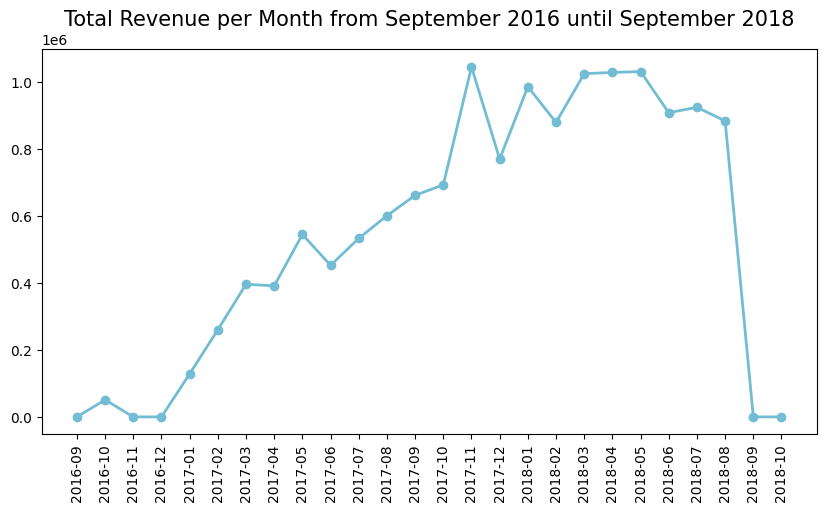

In [122]:
plt.figure(figsize=(10, 5))
plt.plot(
    monthly_orders_df["order_purchase_timestamp"],
    monthly_orders_df["revenue"],
    marker='o', 
    linewidth=2,
    color="#72BCD4"
)
plt.title("Total Revenue per Month from September 2016 until September 2018", loc="center", fontsize=15)
plt.xticks(fontsize=10)
plt.xticks(rotation=90)
plt.yticks(fontsize=10)
plt.show()

**Insight:**

---
1. Kejadian revenue tertinggi:
    - Revenue paling tinggi berurutan terjadi pada bulan **`November 2017`**, **`Mei 2018`**, **`April 2018`**, **`Maret 2018`**, dan **`Januari 2017`**.
2. Kejadian penurunan revenue:
    - Penurunan revenue yang cukup signifikan terjadi pada bulan **`Mei 2017`**, **`Desember 2017`**, **`Februari 2018`**, **`Juni 2018`**, **`September 2018`** dan **`Oktober 2018`**.
    

### Pertanyaan 2: Produk Apa yang Paling Banyak dan Paling Sedikit Terjual?

Analisis ini bertujuan untuk mengetahui `jenis kategori produk` yang paling banyak dibeli dan paling sedikit dibeli berdasarkan pembelian yang dilakukan oleh pengguna.

In [123]:
sum_order_items_df = all_customers_order_df.groupby("product_category_name_english").product_photos_qty.sum().sort_values(ascending=False).reset_index()
sum_order_items_df.head(10)

,product_category_name_english,product_photos_qty
0,furniture_decor,21733.0
1,sports_leisure,19667.0
2,health_beauty,18272.0
3,bed_bath_table,17631.0
4,housewares,17106.0
5,watches_gifts,15527.0
6,computers_accessories,14089.0
7,telephony,13685.0
8,toys,11855.0
9,auto,10970.0


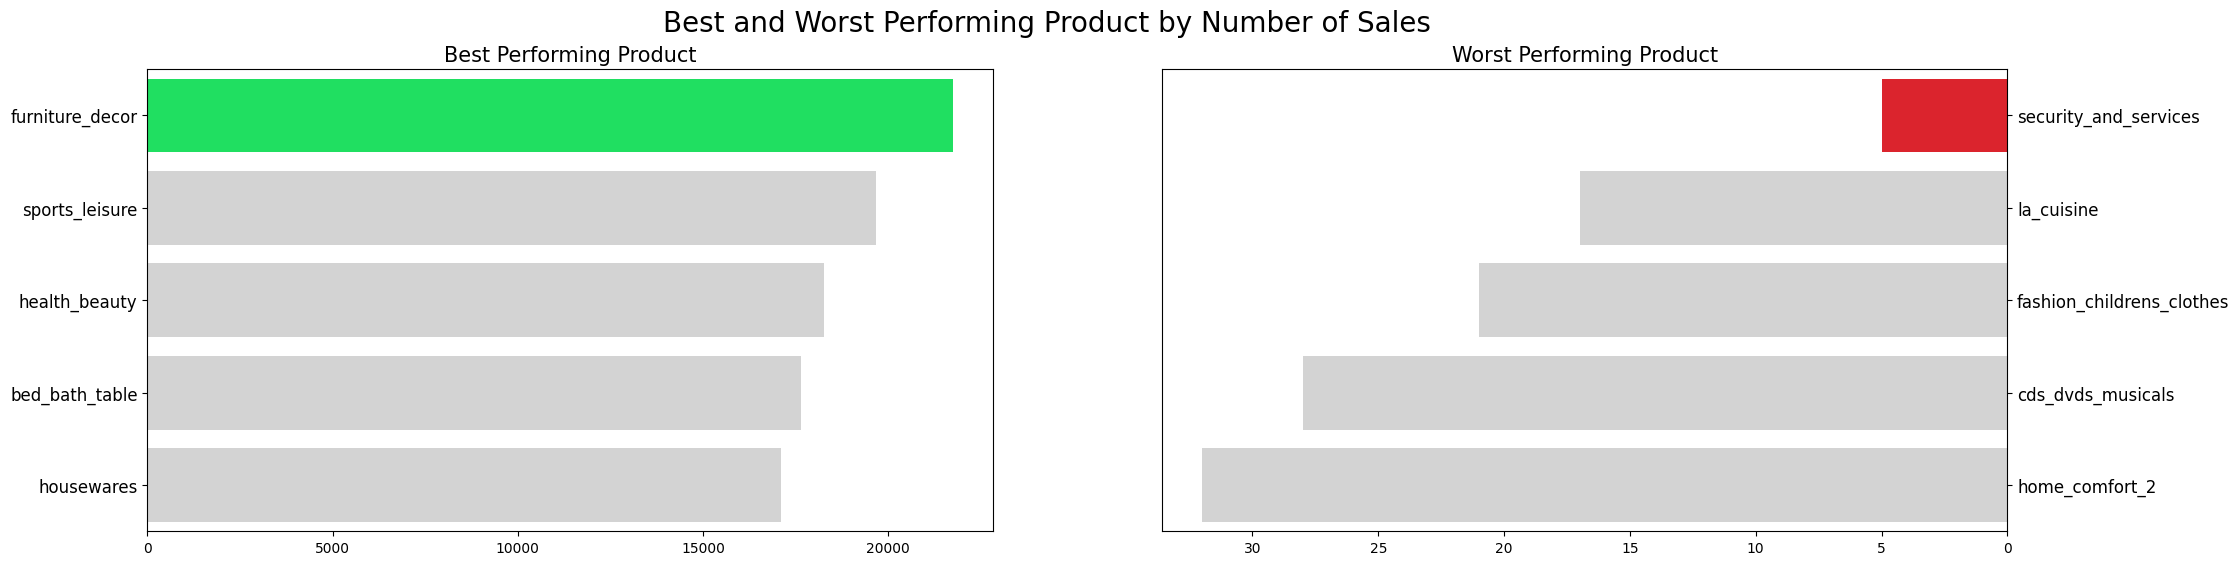

In [134]:
# Memvisualisasikan produk paling laku dan tidak laku

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))
 
colors_best = ["#00FF57", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
colors_worst = ["#F90611", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
 
sns.barplot(x="product_photos_qty", y="product_category_name_english", hue="product_category_name_english", data=sum_order_items_df.head(5), palette=colors_best, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Performing Product", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)
 
sns.barplot(x="product_photos_qty", y="product_category_name_english", hue="product_category_name_english", data=sum_order_items_df.sort_values(by="product_photos_qty", ascending=True).head(5), palette=colors_worst, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Performing Product", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)
 
plt.suptitle("Best and Worst Performing Product by Number of Sales", fontsize=20)
plt.show()

**Insight:**

---
- **Kategori produk `furniture_decor`** merupakan produk paling laris.
- **Kategori produk `security and services`** merupakan produk paling sedikit laris.

### Pertanyaan 3: Bagaimana sebaran metode pembayaran yang digunakan?

Analisis ini bertujuan untuk mencari tahu `jenis metode pembayaran` apa saja yang digunakan ketika melakukan pembelian.

### Berdasarkan Metode Pembayaran yang digunakan

In [135]:
all_customers_order_df.groupby(by="payment_type").order_id.nunique().sort_values(ascending=False)

payment_type
credit_card    76505
boleto         19784
voucher         3866
debit_card      1528
not_defined        3
Name: order_id, dtype: int64

C:\Users\User\AppData\Local\Temp\ipykernel_17768\4250202999.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


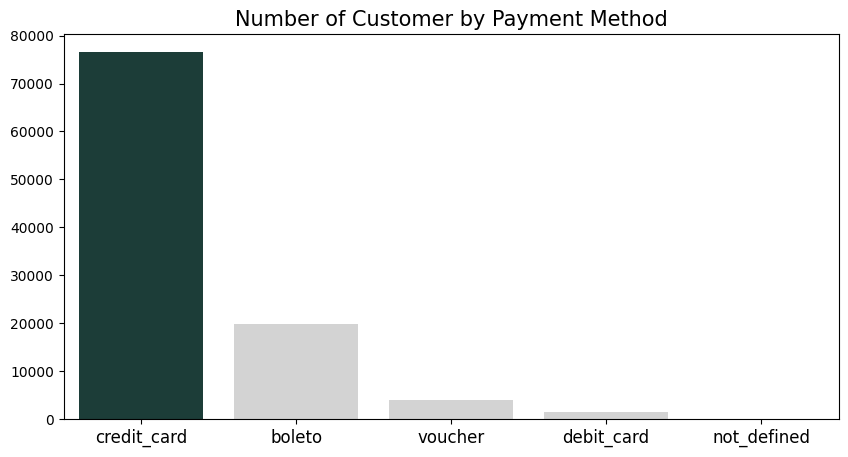

In [136]:
by_paymentmethod_df = all_customers_order_df.groupby(by="payment_type").customer_id.nunique().reset_index()
by_paymentmethod_df.rename(columns={
    "customer_id": "customer_count"
}, inplace=True)
 
colors= ["#16423C", "#D3D3D3", "#D3D3D3", "#D3D3D3","#D3D3D3"]
plt.figure(figsize=(10, 5))
 
sns.barplot(
    y="customer_count", 
    x="payment_type",
    data=by_paymentmethod_df.sort_values(by="customer_count", ascending=False),
    palette=colors
)
plt.title("Number of Customer by Payment Method", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

**Insight:**
- Metode pembayaran paling banyak digunakan adalah **`Credit Card`**.
- Metode pembayaran berikutnya disusul jauh oleh **Boleto, Voucher, Debit Card dan tidak terdefinisi**.

### Pertanyaan 4: Dari segi lokasi geografis, wilayah mana yang melakukan pembelian terbanyak?

Analisis ini bertujuan untuk `memetakan daerah` mana pembelian terbanyak terjadi.

#### Berdasarkan Customer State

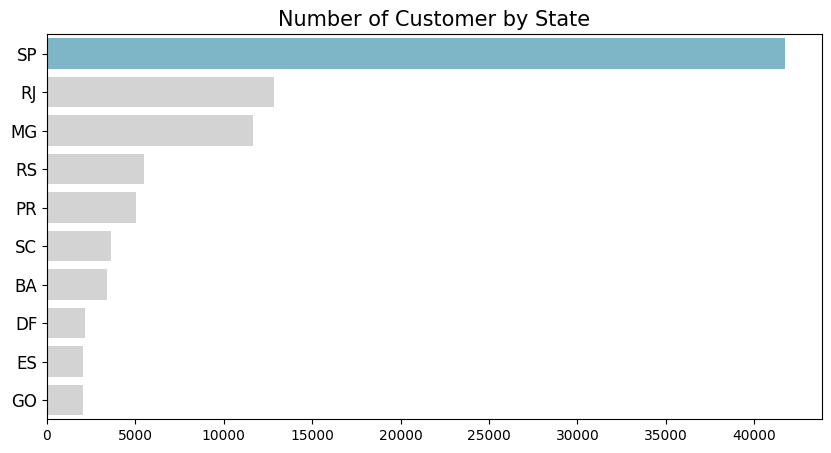

In [138]:
bystate_df = all_customers_order_df.groupby(by="customer_state").customer_id.nunique().reset_index()
bystate_df.rename(columns={
    "customer_id": "customer_count"
}, inplace=True)


bystate_df
plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3","#D3D3D3"]
sns.barplot(
    x="customer_count", 
    y="customer_state",
    hue="customer_state",
    data=bystate_df.sort_values(by="customer_count", ascending=False).head(10),
    palette=colors_
)

plt.title("Number of Customer by State", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

#### Berdasarkan Customer City 

In [139]:
# Jumlah order berdasarkan kota

all_customers_order_df.groupby(by="customer_city").order_id.nunique().sort_values(ascending=False).reset_index().head(10)

,customer_city,order_id
0,sao paulo,15540
1,rio de janeiro,6882
2,belo horizonte,2773
3,brasilia,2131
4,curitiba,1521
5,campinas,1444
6,porto alegre,1379
7,salvador,1245
8,guarulhos,1189
9,sao bernardo do campo,938


C:\Users\User\AppData\Local\Temp\ipykernel_17768\1594187900.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


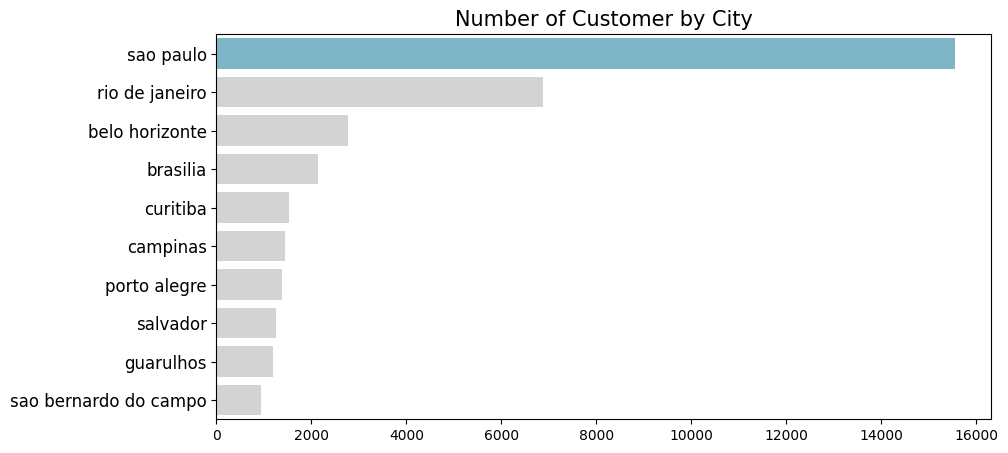

In [ ]:
bycity_df = all_customers_order_df.groupby(by="customer_city").customer_id.nunique().reset_index()
bycity_df.rename(columns={
    "customer_id": "customer_count"
}, inplace=True)

bycity_df
plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3","#D3D3D3","#D3D3D3"]
sns.barplot(
    x="customer_count", 
    y="customer_city",
    hue="customer_city",
    data=bycity_df.sort_values(by="customer_count", ascending=False).head(10),
    palette=colors_
)

plt.title("Number of Customer by City", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

**Insight:**

---
- Pada grafik di atas, terdapat `10 distribusi kota` dengan jumlah pembelian terbanyak.
- Negara bagian dengan kode **SP** merupakan  jumlah pembelian terbanyak.

## Analisis Lanjutan (Opsional)

### RFM Analysis

RFM Analis bertujuan untuk mengetahui pelanggan mana yang memiliki high value (sering melakukan transaksi dan menghasilkan revenue yang besar) dan low value. 
- Recency: parameter yang digunakan untuk melihat kapan terakhir seorang pelanggan melakukan transaksi.
- Frequency: parameter ini digunakan untuk mengidentifikasi seberapa sering seorang pelanggan melakukan transaksi.
- Monetary: parameter terakhir ini digunakan untuk mengidentifikasi seberapa besar revenue yang berasal dari pelanggan tersebut. 

In [143]:
rfm_df = all_customers_order_df.groupby(by="customer_id", as_index=False).agg({
    "order_purchase_timestamp": "max", # mengambil tanggal order terakhir
    "order_id": "nunique", # menghitung jumlah order
    "price": "sum" # menghitung jumlah revenue yang dihasilkan
})
rfm_df.columns = ["customer_id", "max_order_timestamp", "frequency", "monetary"]
 
# menghitung kapan terakhir pelanggan melakukan transaksi (hari)
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = orders_df["order_purchase_timestamp"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)
 
rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df.head()

,customer_id,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,1,89.80,337
1,000161a058600d5901f007fab4c27140,1,54.90,458
2,0001fd6190edaaf884bcaf3d49edf079,1,179.99,596
3,0002414f95344307404f0ace7a26f1d5,1,149.90,427
4,000379cdec625522490c315e70c7a9fb,1,93.00,198


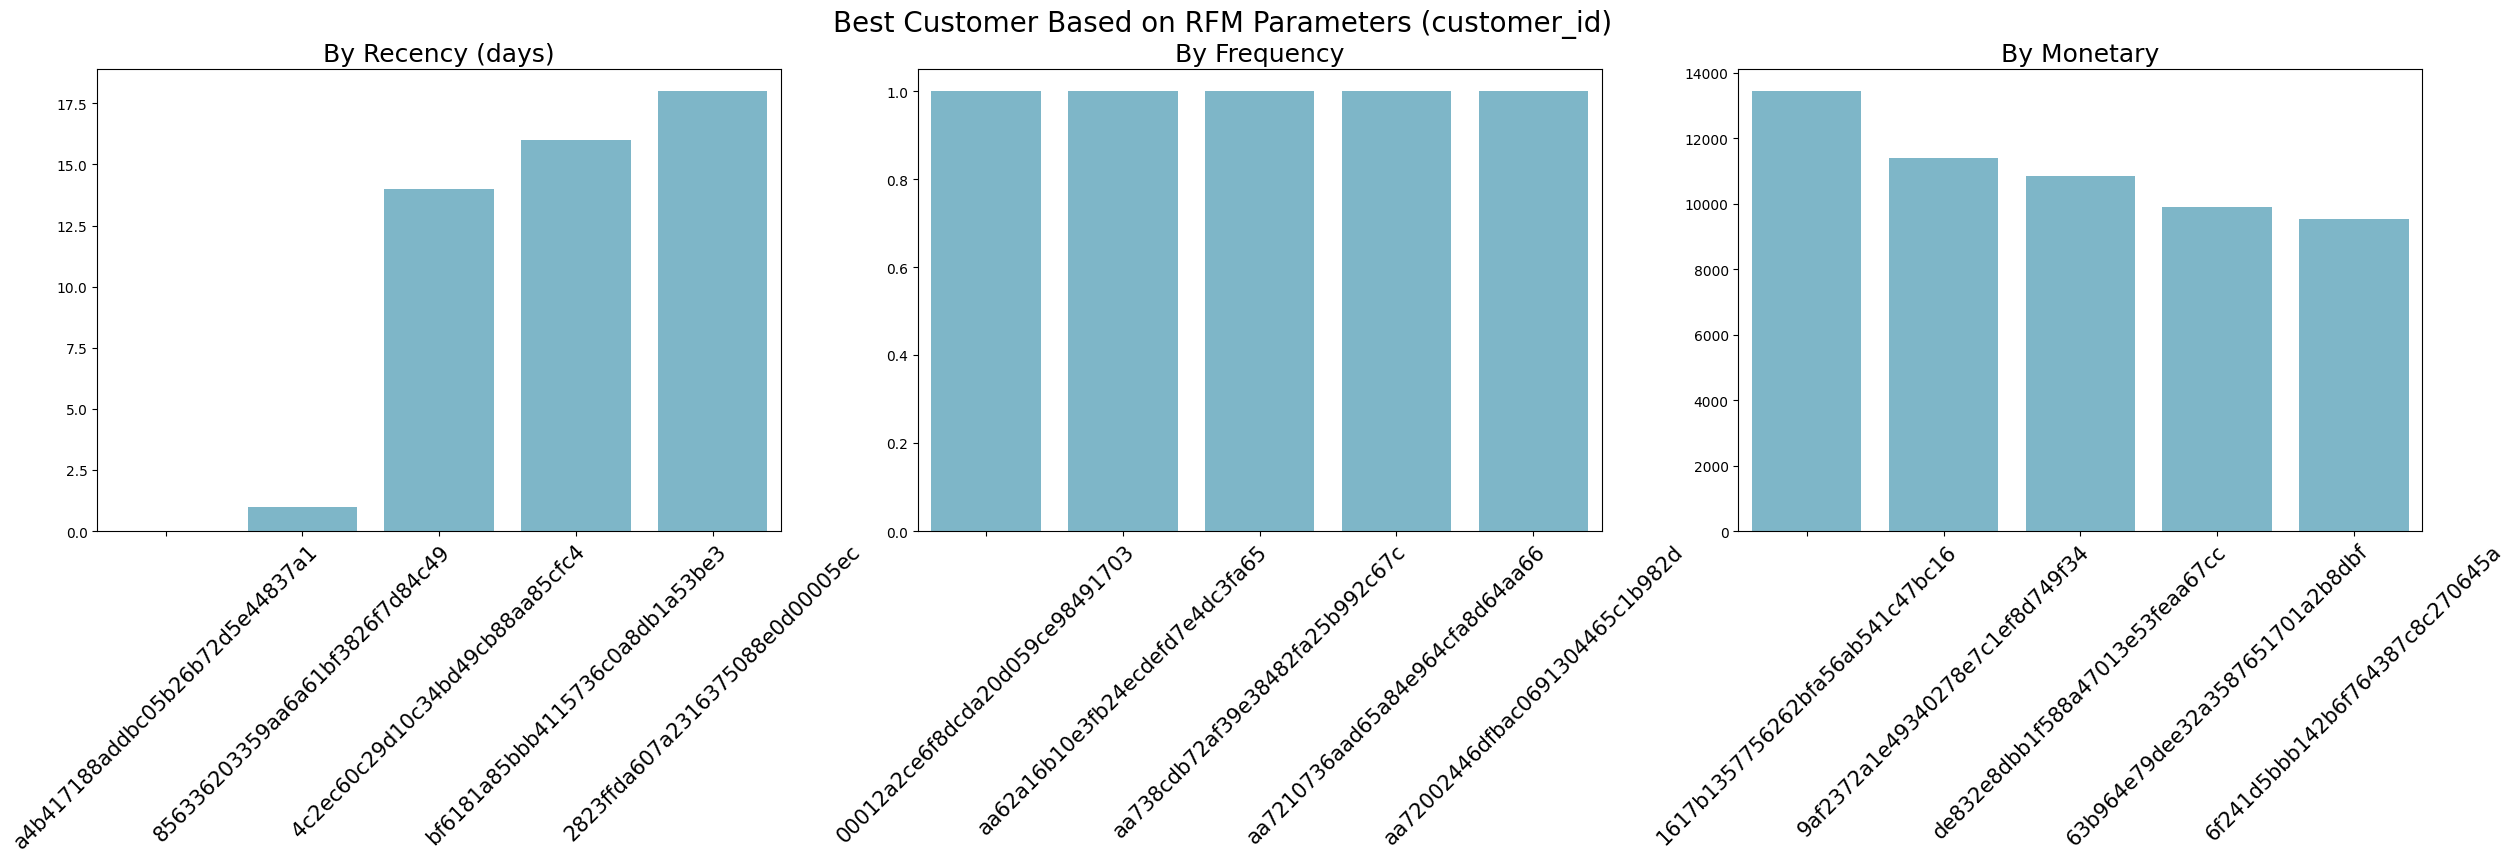

In [67]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))
 
colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]
 
sns.barplot(y="recency", x="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15, rotation=45)

 
sns.barplot(y="frequency", x="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15, rotation=45)
 
sns.barplot(y="monetary", x="customer_id", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15, rotation=45)
 
plt.suptitle("Best Customer Based on RFM Parameters (customer_id)", fontsize=20)
plt.show()

**Insight:**

---
- Hasil tersebut menunjukkan pelanggan mana saja yang sering melakukan:
    - **`order`** (by Recency), 
    - melakukan **`transaksi`** (by Frequency), dan 
    - menghasilkan **`revenue`** yang besar (by Monetary).

## Conclusion

#### Pertanyaan 1: Bagaimana Performa Penjualan dan Revenue Perusahaan dalam dua tahun (2016-2018)?

- Berdasarkan grafik di atas, revenue paling tinggi berurutan terjadi pada bulan November 2017, Mei 2018, April 2018, Maret 2018, dan Januari 2017**. Sedangkan penurunan revenue yang cukup signifikan terjadi pada bulan Mei 2017, Desember 2017, Februari 2018, Juni 2018, September 2018 dan Oktober 2018.

#### Pertanyaan 2: Produk Apa yang Paling Banyak dan Paling Sedikit Terjual?

- Kategori produk yang paling banyak terjual adalah furniture_decor dengan total pembelian sebesar 20820 barang dan kategori produk yang paling sedikit dibeli adalah security and services dengan total produk 5 barang.

#### Pertanyaan 3: Bagaimana sebaran metode pembayaran yang digunakan?

- Sebaran Metode pembayaran yang sering digunakan adalah Credit Card, Boleto, Voucher, Debit Card dan tidak terdefenisi. Adapun metode pembayaran yang paling banyak digunakan adalah Credit Card sebanyak 76505 transaksi.

#### Pertanyaan 4:  Dari segi lokasi geografis, wilayah mana yang melakukan pembelian terbanyak?

- Berdasarkan explorasi dan visualisasi, daerah yang paling banyak membeli barang dari E-commerce adalah Sao Paulo State (SP) dan untuk kota yaitu Kota Sao Paulo dengan jumlah 15540 pembelian. Perbedaan jumlah pembeli pada Sao Paulo cenderung jauh dibandingkan dengan negara bagian dan kota lainnya.

In [146]:
# Deploy Dashboard
all_customers_order_df.to_csv("all_data.csv", index=False)